In [52]:
import numpy as np
import pandas as pd 
import h5py

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize, LogNorm

from sklearn.utils import shuffle

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

np.random.seed(7)

def get_data(filename):
    """
        This just takes the data and puts it in the shape and format that I would like to deal with.
        The data is converted to an hdf5 file using kratsg's gML file on github: https://github.com/kratsg/gML.git
    """
    data = h5py.File(filename, 'r')
    # 28 eta rows and 32 phi columns
    gTowerEt = data['gTowerEt'][:].reshape(-1, 28, 32)
    return (gTowerEt)

In [53]:
gTowerEt_background1 = get_data("JZ0W_hdf5/user._010556.JZ0W.hdf5")
gTowerEt_background2 = get_data("JZ0W_hdf5/user._010590.JZ0W.hdf5")
gTowerEt_background3 = get_data("JZ0W_hdf5/user._010592.JZ0W.hdf5")
gTowerEt_background4 = get_data("JZ0W_hdf5/user._010594.JZ0W.hdf5")
gTowerEt_background = np.concatenate([gTowerEt_background1
                                 ,gTowerEt_background2
                                 ,gTowerEt_background3
                                 ,gTowerEt_background4])



In [54]:
gTowerEt_signal1 = get_data("ZvvHbb_hdf5/user._000118.ZvvHbb.hdf5")
gTowerEt_signal2 = get_data("ZvvHbb_hdf5/user._000123.ZvvHbb.hdf5")
gTowerEt_signal3 = get_data("ZvvHbb_hdf5/user._000130.ZvvHbb.hdf5")
gTowerEt_signal4 = get_data("ZvvHbb_hdf5/user._000139.ZvvHbb.hdf5")
gTowerEt_signal = np.concatenate([gTowerEt_signal1
                                 ,gTowerEt_signal2
                                 ,gTowerEt_signal3
                                 ,gTowerEt_signal4])

Now I need to see what my data looks like. 

The background (JZ0W) has more jets that should show up on the images.
So there should be more dots coming through on the images.

The signal (ZvvHbb) should have 1 or 2 jets that are visable


(1000, 28, 32)


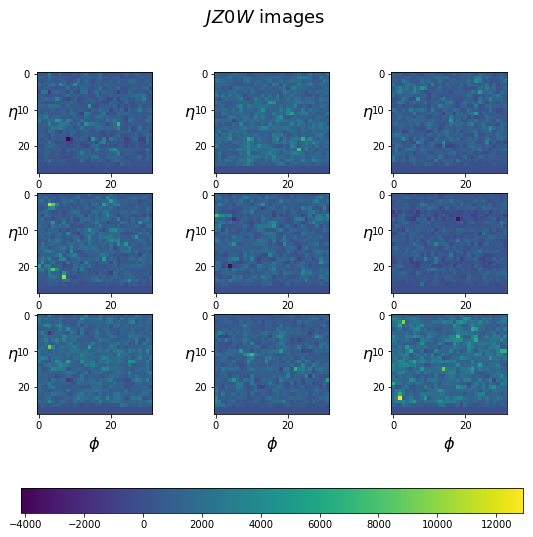

In [55]:
f, axarr = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
f.suptitle("$JZ0W$ images", fontsize = 18)
print gTowerEt_background.shape
    
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[2,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)


axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[0,2].set_xlabel("$\phi$", fontsize=16)

axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,2].set_xlabel("$\phi$", fontsize=16)

axarr[2,0].set_xlabel("$\phi$", fontsize=16)
axarr[2,1].set_xlabel("$\phi$", fontsize=16)
axarr[2,2].set_xlabel("$\phi$", fontsize=16)


vmin = min(gTowerEt_background[0].min(), 
           gTowerEt_background[1].min(), 
           gTowerEt_background[2].min(), 
           gTowerEt_background[3].min(),
           gTowerEt_background[4].min(),
           gTowerEt_background[5].min(),
           gTowerEt_background[6].min(),
           gTowerEt_background[7].min(),
           gTowerEt_background[8].min(),
           )

vmax = max(gTowerEt_background[0].max(), 
           gTowerEt_background[1].max(), 
           gTowerEt_background[2].max(), 
           gTowerEt_background[3].max(),
           gTowerEt_background[4].max(), 
           gTowerEt_background[5].max(), 
           gTowerEt_background[6].max(), 
           gTowerEt_background[7].max(),
           gTowerEt_background[8].max()
          )

g0 = axarr[0,0].imshow(gTowerEt_background[0])
g1 = axarr[0,1].imshow(gTowerEt_background[1])
g2 = axarr[0,2].imshow(gTowerEt_background[2])

g3 = axarr[1,0].imshow(gTowerEt_background[3])
g4 = axarr[1,1].imshow(gTowerEt_background[4])
g5 = axarr[1,2].imshow(gTowerEt_background[5])

g6 = axarr[2,0].imshow(gTowerEt_background[6])
g7 = axarr[2,1].imshow(gTowerEt_background[7])
g8 = axarr[2,2].imshow(gTowerEt_background[8])

norm = colors.Normalize(vmin=vmin, vmax=vmax)

g0.set_norm(norm)
g1.set_norm(norm)
g2.set_norm(norm)
g3.set_norm(norm)
g4.set_norm(norm)
g5.set_norm(norm)
g6.set_norm(norm)
g7.set_norm(norm)
g8.set_norm(norm)

f.colorbar(g0, ax = axarr, orientation='horizontal')

plt.show()

(1000, 28, 32)


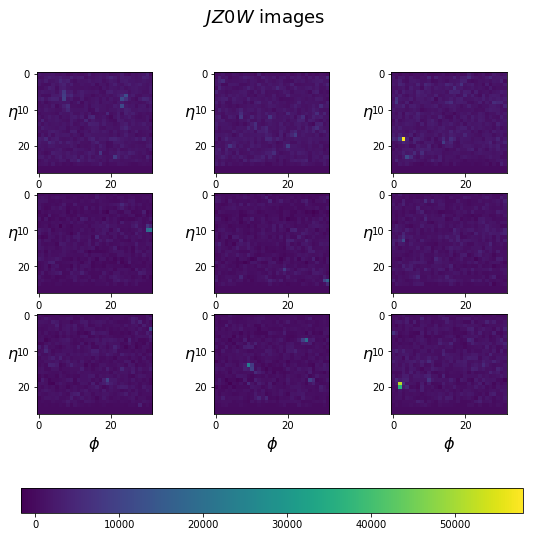

In [56]:
g, axarr = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
g.suptitle("$JZ0W$ images", fontsize = 18)
print gTowerEt_background.shape
    
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[2,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[2,2].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)


axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[0,2].set_xlabel("$\phi$", fontsize=16)

axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,2].set_xlabel("$\phi$", fontsize=16)

axarr[2,0].set_xlabel("$\phi$", fontsize=16)
axarr[2,1].set_xlabel("$\phi$", fontsize=16)
axarr[2,2].set_xlabel("$\phi$", fontsize=16)


vmin = min(gTowerEt_signal[0].min(), 
           gTowerEt_signal[1].min(), 
           gTowerEt_signal[2].min(), 
           gTowerEt_signal[3].min(),
           gTowerEt_signal[4].min(),
           gTowerEt_signal[5].min(),
           gTowerEt_signal[6].min(),
           gTowerEt_signal[7].min(),
           gTowerEt_signal[8].min(),
           )

vmax = max(gTowerEt_signal[0].max(), 
           gTowerEt_signal[1].max(), 
           gTowerEt_signal[2].max(), 
           gTowerEt_signal[3].max(),
           gTowerEt_signal[4].max(), 
           gTowerEt_signal[5].max(), 
           gTowerEt_signal[6].max(), 
           gTowerEt_signal[7].max(),
           gTowerEt_signal[8].max()
          )

g0 = axarr[0,0].imshow(gTowerEt_signal[0])
g1 = axarr[0,1].imshow(gTowerEt_signal[1])
g2 = axarr[0,2].imshow(gTowerEt_signal[2])

g3 = axarr[1,0].imshow(gTowerEt_signal[3])
g4 = axarr[1,1].imshow(gTowerEt_signal[4])
g5 = axarr[1,2].imshow(gTowerEt_signal[5])

g6 = axarr[2,0].imshow(gTowerEt_signal[6])
g7 = axarr[2,1].imshow(gTowerEt_signal[7])
g8 = axarr[2,2].imshow(gTowerEt_signal[8])

norm = colors.Normalize(vmin=vmin, vmax=vmax)

g0.set_norm(norm)
g1.set_norm(norm)
g2.set_norm(norm)
g3.set_norm(norm)
g4.set_norm(norm)
g5.set_norm(norm)
g6.set_norm(norm)
g7.set_norm(norm)
g8.set_norm(norm)

g.colorbar(g0, ax = axarr, orientation='horizontal')

plt.show()

These look about right. Except for the blue lines from about 27 to 28 on the $\eta$ rows. So I still need to clean that up i.e. take it out

I also need to create labels and shuffle this data. But first I need to convert the data to a pandas array

In [57]:
def flatten_data(data, second_dim):
    """
        Flatten data from 3 Dimensions to 2 Dimensions
        data: 3D input
        second_dim: what we want to flatten the input into 
    """
    flat_array = data.reshape(-1, second_dim)
    return flat_array

#get the signal flattened
gTower_signal_flat = flatten_data(gTowerEt_signal, 28*32)
gTower_background_flat = flatten_data(gTowerEt_background, 28*32)

# check what the data looks like now
print "shapes:\n signal:{}\n background {}".format(gTower_signal_flat.shape, gTower_background_flat.shape)

# convert to a pandas data frame
df_signal_flat = pd.DataFrame(gTower_signal_flat)
df_background_flat = pd.DataFrame(gTower_background_flat)

#check what the data looks like
print "Row 832 is the last row in signal with all zeros: sum(832) = {}".format(df_signal_flat[832].sum())
print "Row 831 is the first row in sgnal with not all zeros: sum(831) = {}".format(df_signal_flat[831].sum())

#drop zero columns
df_signal_flat.drop(df_signal_flat.columns[832:], axis=1, inplace=True)

print "Row 832 is the last row in background with all zeros: sum(832) = {}".format(df_background_flat[832].sum())
print "Row 831 is the first row in background with not all zeros: sum(831) = {}".format(df_background_flat[831].sum())

#drop zero columns
df_background_flat.drop(df_background_flat.columns[832:], axis=1, inplace=True)

df_signal_flat.head()

shapes:
 signal:(1000, 896)
 background (1000, 896)
Row 832 is the last row in signal with all zeros: sum(832) = 0.0
Row 831 is the first row in sgnal with not all zeros: sum(831) = 568013.125
Row 832 is the last row in background with all zeros: sum(832) = 0.0
Row 831 is the first row in background with not all zeros: sum(831) = 499746.78125


,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,1948.007568,1229.803589,1362.211670,1773.021362,1805.363159,937.377747,770.113647,1283.386475,0.000000,463.752502,...,1453.622314,1195.590210,991.512695,595.912720,180.354721,337.931519,828.340332,862.571777,830.117065,797.693115
1,504.729767,1053.224731,1948.789429,472.535736,431.983521,1618.163696,1084.297852,522.354248,1145.151978,884.213806,...,674.066772,1018.593689,2172.189453,1589.266357,1166.685791,845.343872,433.920105,595.932251,2259.294922,1107.355469
2,949.828003,716.895020,123.326370,945.230530,718.803589,65.158417,812.612000,702.350159,560.865112,1201.162842,...,394.760132,0.000000,322.434998,591.893433,846.602661,-170.080933,975.725342,134.924530,3593.008057,1467.026855
3,226.033798,-61.546230,538.230469,27.106960,0.000000,177.788284,159.796814,568.038025,154.135437,0.000000,...,114.888306,78.900848,1171.467407,0.719444,492.379333,1436.708984,138.477692,80.839256,73.998993,-30.185978
4,-151.946899,429.102966,270.738861,205.938675,233.599579,532.302063,735.905396,104.528160,657.799927,-145.565964,...,344.546844,78.911766,1261.254395,620.452209,251.628922,482.965149,1691.376953,29.792877,784.313354,5042.091797


In [58]:
df_background_flat.head()

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,102.223244,368.700684,137.223206,3186.571777,3.529137,0.000000,1580.153198,88.257584,241.882187,132.519989,...,-174.814178,1479.688599,442.842407,763.384705,183.145950,307.035736,380.927002,444.837280,524.020386,197.409546
1,1862.122681,725.858398,495.343079,522.689270,1037.605713,1459.342163,1467.959839,951.591431,1289.745483,0.000000,...,1474.365601,754.765991,804.412048,987.892090,949.158386,317.838837,1316.921509,711.112122,566.910278,1134.835327
2,1338.201538,63.295807,1250.506104,1.934196,105.690559,1010.898010,814.236450,68.646568,-44.988132,871.175598,...,128.142059,99.144165,91.923775,337.149536,-27.088104,296.295044,826.219788,259.561218,504.078888,118.668991
3,508.373199,357.868134,54.637264,761.106384,240.089447,100.703369,477.226807,444.954498,702.838623,109.055504,...,524.925659,1218.190186,0.000000,983.982910,704.678345,472.131653,111.450127,762.669006,20.642662,627.526917
4,1759.074219,1074.358521,51.794151,659.456604,-419.165039,619.112854,219.199036,487.793335,622.421021,32.543133,...,678.214233,395.708679,401.175659,570.642761,652.222168,319.069214,204.106003,1265.324707,103.765228,440.996307


Great! Now that I've removed the rows of zeros I can add the labels to the signal for training later on

In [59]:
def add_ones_or_zeros(data_frame, one_or_zero):
    """
        data_frame: should be a pandas Data Frame
        
        add ones or zeros to data depending on whether it is signal or background
    """
    if one_or_zero == 1:
        label = np.ones(len(data_frame))
        label_series = pd.Series(label)
        
        
    elif one_or_zero == 0:
        label = np.zeros(len(data_frame))
        label_series = pd.Series(label)
        
    else:
        print("Error: Not a 1 or 0")
        return None
    
    data_frame["832"] = label_series
    return data_frame 
    
df_signal_with_label = add_ones_or_zeros(df_signal_flat, 1)
df_background_with_label = add_ones_or_zeros(df_background_flat, 0)

print df_signal_with_label["832"].sum(), df_background_with_label["832"].sum()

1000.0 0.0


Now I want to combine these two data frames and shuffle them so that they are randomly distributed. I don't think I need to do this since the data is randomly sampled. But I would prefer that the data is already mixed up just to be sure I don't have any issues with overfitting.

In [60]:
df = pd.concat([df_background_with_label, df_signal_with_label])

In [61]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,832
72,617.601318,1025.455811,0.000000,1011.240295,99.958839,333.287323,1539.869385,1168.764648,738.572998,372.952454,...,134.856674,-10.657075,26.755604,2667.298828,499.250366,27.744547,1043.870361,326.671387,1146.979004,1.0
48,2.102772,723.881165,296.339325,356.064789,543.670959,457.909302,764.226318,331.417816,760.755249,-15.101002,...,336.678497,29.638662,690.665833,660.871948,482.679749,848.962769,121.525925,280.449341,1931.817627,1.0
204,528.239075,186.798325,-79.647118,-66.266968,281.066620,62.878704,95.930397,0.000000,515.882568,289.449341,...,245.353912,92.703529,127.512253,-160.476349,213.109863,488.552246,555.118774,304.462646,161.072601,0.0
694,2684.563232,2531.401123,692.038208,242.560425,1206.665771,996.734131,335.721771,378.905792,496.130066,796.467285,...,507.889740,137.892517,827.784912,1302.798584,329.696167,810.409546,637.320984,674.380676,970.458496,0.0
758,473.478973,251.773315,124.237930,524.202026,28.579481,109.355637,663.056824,176.261261,42.052715,105.625214,...,427.932251,806.014404,334.009796,560.595093,241.998962,306.200806,454.349487,135.056351,367.607117,1.0


This looks nice and shuffled so now I will seperate out the data again of these shuffled images so that I have x and y values for training

In [62]:
labels = df['832']
labels = np.array(labels)
print labels[:10]

[1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [63]:
df.drop(df.columns[832], axis=1, inplace=True)
images = np.array(df)
print len(images[0])

832


Now I need to reshape the data since I eliminated a couple rows. 

With some fiddling I found that it should be reshaped as (26, 32)

In [64]:
maximum_cell = max(x for x in df.max())
print maximum_cell

334259.3125


In [65]:
images_reshaped = images[:].reshape(-1, 26, 32)

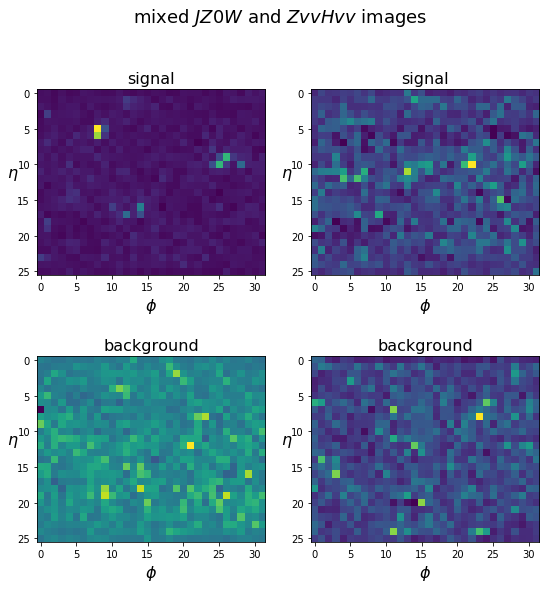

In [66]:
def signal_or_background(label):
    """
        Tells us if the image is signal or background for plotting
    """
    if label == 0.0:
        return "background"
    else:
        return "signal"


f, axarr = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
f.suptitle("mixed $JZ0W$ and $ZvvHvv$ images", fontsize = 18)
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)

axarr[0,0].set_title("{}".format(signal_or_background(labels[0])), fontsize=16)
axarr[0,1].set_title("{}".format(signal_or_background(labels[1])), fontsize=16)
axarr[1,0].set_title("{}".format(signal_or_background(labels[2])), fontsize=16)
axarr[1,1].set_title("{}".format(signal_or_background(labels[3])), fontsize=16)

axarr[0,0].imshow(images_reshaped[0])
axarr[0,1].imshow(images_reshaped[1])
axarr[1,0].imshow(images_reshaped[2])
axarr[1,1].imshow(images_reshaped[3])

plt.show()

Now I need to reshape the array for training in the CNN and convert the signal and background labels into one-hot encodings

In [67]:
images_reshaped = images[:].reshape(-1, 26, 32, 1) 
print images_reshaped.shape

(2000, 26, 32, 1)


In [68]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

# labels_cat = to_categorical(labels, num_classes = 2)
# print labels_cat[:10]

In [69]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(26,32,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(images_reshaped)

batch_size = 32
epochs = 50

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 32, 32)        320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 16, 64)        18496     
__________

In [71]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(images_reshaped, labels, test_size=0.33, random_state=42)
x_val, x_te, y_val, y_te = train_test_split(x_val, y_val, test_size=0.33, random_state=42)

In [72]:
history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size = batch_size), validation_data = (x_val, y_val) ,epochs = epochs, verbose=2, steps_per_epoch=x_tr.shape[0] // batch_size, callbacks = [reduce_lr])

Epoch 1/50
 - 9s - loss: 0.7242 - acc: 0.7256 - val_loss: 0.6046 - val_acc: 0.6833
Epoch 2/50
 - 6s - loss: 0.5402 - acc: 0.7766 - val_loss: 0.6313 - val_acc: 0.7059
Epoch 3/50
 - 6s - loss: 0.5077 - acc: 0.7938 - val_loss: 0.4133 - val_acc: 0.8416
Epoch 4/50
 - 6s - loss: 0.4656 - acc: 0.8161 - val_loss: 0.3734 - val_acc: 0.8733
Epoch 5/50
 - 6s - loss: 0.4498 - acc: 0.8168 - val_loss: 0.3857 - val_acc: 0.8733
Epoch 6/50
 - 6s - loss: 0.4466 - acc: 0.8113 - val_loss: 0.3688 - val_acc: 0.8710
Epoch 7/50
 - 6s - loss: 0.4223 - acc: 0.8170 - val_loss: 0.3464 - val_acc: 0.8846
Epoch 8/50
 - 6s - loss: 0.4327 - acc: 0.8226 - val_loss: 0.3477 - val_acc: 0.8665
Epoch 9/50
 - 6s - loss: 0.4530 - acc: 0.8127 - val_loss: 0.3506 - val_acc: 0.8801
Epoch 10/50
 - 6s - loss: 0.4101 - acc: 0.8237 - val_loss: 0.3329 - val_acc: 0.8710
Epoch 11/50
 - 6s - loss: 0.4159 - acc: 0.8329 - val_loss: 0.3403 - val_acc: 0.8733
Epoch 12/50
 - 6s - loss: 0.3920 - acc: 0.8319 - val_loss: 0.3275 - val_acc: 0.8710
E

In [73]:
scores = model.evaluate(x_te, y_te, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 16.97%


In [74]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss', 'lr']


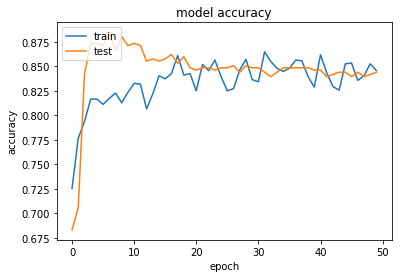

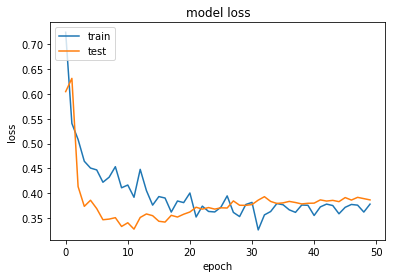

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(x_te).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_te, y_pred_keras)

In [77]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

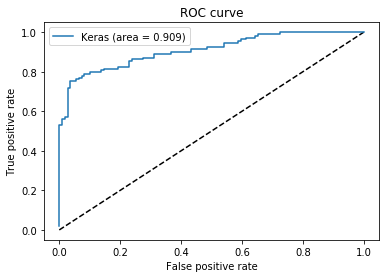

In [79]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()